# Jupyter

In [6]:
print "this is my first notebook."
import numpy as np

this is my first notebook.


In [1]:
print "REPL: "
x = 1
print x+7

REPL: 
8


In [2]:
def my_func(x):
    # or - why you should be careful with python.. 
    x += 7
    print x


In [3]:
my_func(10)
print x

17
1


In [9]:
y = np.arange(4)
print y
y+=8
print y

[0 1 2 3]
[ 8  9 10 11]


In [10]:
my_func(y)
print y

[15 16 17 18]
[15 16 17 18]


In [11]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn import datasets

%matplotlib inline

In [12]:
# Data types - 
grades = [['joao', 'F', '20/10/1989', 100], 
['maria', 'M', '15/12/1993', 80],
['pedro', 'M',  '10/13/1991', 90],
['catarina', 'F',  '04/08/1980', 84],
['felipe', 'F',  '15/12/1993', 95],
['adriana', 'M',  '15/12/1993', 60],
['yankee', 'F',  '04/08/1980', 70]]
df = pd.DataFrame(grades, columns=["name", "gender", "DOB", "grade"])


In [13]:
# Series
type(df.name)
df.name.drop_duplicates()
# numpy 
type(df.name.values)

numpy.ndarray

In [16]:
# looking on the top: 
df.head(3)
df.tail(2)

,name,gender,DOB,grade
5,adriana,M,15/12/1993,60
6,yankee,F,04/08/1980,70


In [17]:
# Slicing dataforame:
# a column:
df.name
df["name"]
df.loc[:,"name"]
df.iloc[:,0]
# a row: 
df.ix[1]
df.iloc[0, :]
df.loc[0, :]
# column + row:
df.loc[0, "name"]

C:\Users\shkotler\AppData\Local\Continuum\anaconda2\lib\site-packages\ipykernel_launcher.py:8: DeprecationWarning: 
.ix is deprecated. Please use
.loc for label based indexing or
.iloc for positional indexing

See the documentation here:
http://pandas.pydata.org/pandas-docs/stable/indexing.html#ix-indexer-is-deprecated
  


'joao'

In [18]:
# adding a column: 
df["new_col"] = range(len(df))
df["new_col1"] = 0
# adding a row
df.loc["junk"] = range(df.shape[1])

In [19]:
# drop a columm: 
df = df.drop(["new_col", "new_col1"], 1)  # not implace..
# drop a row: 
df = df.drop("junk", 0)

In [20]:
# sort values
df.sort_values(['grade'], ascending=False)

,name,gender,DOB,grade
0,joao,F,20/10/1989,100
4,felipe,F,15/12/1993,95
2,pedro,M,10/13/1991,90
3,catarina,F,04/08/1980,84
1,maria,M,15/12/1993,80
6,yankee,F,04/08/1980,70
5,adriana,M,15/12/1993,60


In [21]:
# basic function on columns
df.shape
df.describe()
df.sum(1), df.sum(0)
#mean, count, std..

# apply : 
df["grade_*2"] = df.grade.apply(lambda x: x*2.)
df["name_gender"] = df.name + "_" + df.gender
df

,name,gender,DOB,grade,grade_*2,name_gender
0,joao,F,20/10/1989,100,200.0,joao_F
1,maria,M,15/12/1993,80,160.0,maria_M
2,pedro,M,10/13/1991,90,180.0,pedro_M
3,catarina,F,04/08/1980,84,168.0,catarina_F
4,felipe,F,15/12/1993,95,190.0,felipe_F
5,adriana,M,15/12/1993,60,120.0,adriana_M
6,yankee,F,04/08/1980,70,140.0,yankee_F


In [22]:
df.drop_duplicates()
df["ccc"] = None
df = df.fillna(-9)
df = df.drop("ccc", 1)

In [24]:
# Data types - 
grades = [['joao', 'F', "Computer"], 
['maria', 'M', "Laws"],
['pedro', 'M', "Computer"],
['catarina', 'F', "Physics"]]
df2 = pd.DataFrame(grades, columns=["name", "gender", "degree"])

In [25]:
df2.head(2)

,name,gender,degree
0,joao,F,Computer
1,maria,M,Laws


In [ ]:
df

In [26]:
# merge
pd.merge(df, df2, on=["name", "gender"], how="left")
pd.merge(df, df2, on=["name", "gender"], how="inner")
# append
df2.append(df)
# concatenate..(see documentation.. )

,DOB,degree,gender,grade,grade_*2,name,name_gender
0,NaN,Computer,F,NaN,NaN,joao,NaN
1,NaN,Laws,M,NaN,NaN,maria,NaN
2,NaN,Computer,M,NaN,NaN,pedro,NaN
3,NaN,Physics,F,NaN,NaN,catarina,NaN
0,20/10/1989,NaN,F,100.0,200.0,joao,joao_F
1,15/12/1993,NaN,M,80.0,160.0,maria,maria_M
2,10/13/1991,NaN,M,90.0,180.0,pedro,pedro_M
3,04/08/1980,NaN,F,84.0,168.0,catarina,catarina_F
4,15/12/1993,NaN,F,95.0,190.0,felipe,felipe_F
5,15/12/1993,NaN,M,60.0,120.0,adriana,adriana_M


In [27]:
# conditions: 
df[df.gender=="F"]
df[(df.gender=="F") & (df.grade>80)]
df["is_female"] = df.gender=="F"
df[df.is_female]

,name,gender,DOB,grade,grade_*2,name_gender,is_female
0,joao,F,20/10/1989,100,200.0,joao_F,True
3,catarina,F,04/08/1980,84,168.0,catarina_F,True
4,felipe,F,15/12/1993,95,190.0,felipe_F,True
6,yankee,F,04/08/1980,70,140.0,yankee_F,True


In [28]:
# groupby
df.groupby(["gender"]).mean()["grade"]

gender
F    87.250000
M    76.666667
Name: grade, dtype: float64

In [29]:
# be aware of python - 
def my_func(df):
    df["hello"] = 1
    return "hi"

In [ ]:
my_func(df)

# DATA SET - BOSTON

In [ ]:
# Load data set: 
boston = datasets.load_boston()
y = boston['target']
x = pd.DataFrame(boston['data'])
x.columns = boston['feature_names']

In [33]:
#print boston['DESCR']

In [ ]:
boston_df = x
boston_df["Prices"] = y
boston_df

In [35]:
# Save\write to csv: 
boston_df.to_csv("boston_prices.csv", index=None)
boston_df = pd.DataFrame.from_csv("boston_prices.csv", index_col=None)

In [36]:
boston_df.mean()
boston_df.std()

CRIM         8.596783
ZN          23.322453
INDUS        6.860353
CHAS         0.253994
NOX          0.115878
RM           0.702617
AGE         28.148861
DIS          2.105710
RAD          8.707259
TAX        168.537116
PTRATIO      2.164946
B           91.294864
LSTAT        7.141062
Prices       9.197104
dtype: float64

In [ ]:
## NOW - 10 minutes to load the data - and noramlized the dataframe.. 

In [ ]:
# normalize a column (PCA... )
s = (boston_df.B-boston_df.B.mean())/boston_df.B.std()
s.mean(), s.std()
boston_df.B = s
# normalize matrix.. 
(boston_df - boston_df.mean())/boston_df.std()

In [ ]:
# pearson correlation 
np.corrcoef(boston_df.INDUS.values, boston_df.CRIM.values)[0, 1]

In [ ]:
#print boston['DESCR']
np.corrcoef(boston_df.RM, boston_df.AGE.values)[0, 1]

In [40]:
boston_df["age*rooms"] = boston_df.RM.values * boston_df.AGE.values

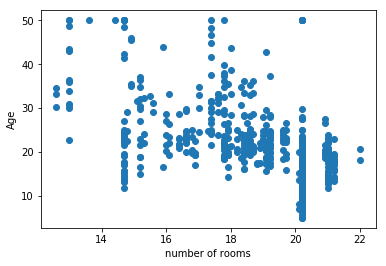

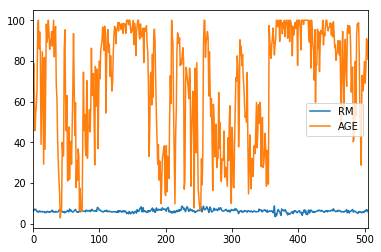

In [38]:
plt.scatter(boston_df.PTRATIO.values , boston_df.Prices.values)
plt.xlabel("number of rooms")
plt.ylabel("Age")
boston_df.loc[:,["RM", "AGE"]].plot()

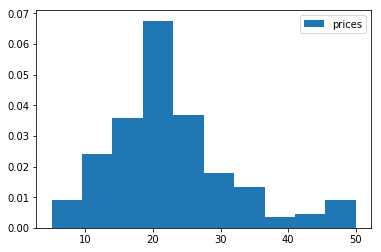

In [41]:
plt.hist(boston_df.Prices.values, label="prices", normed=1)
plt.legend()

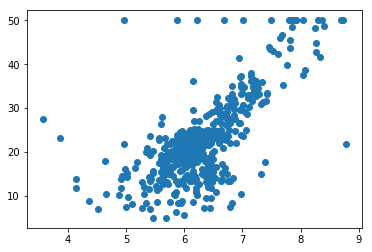

In [42]:
plt.scatter(boston_df.RM.values , boston_df.Prices.values)

In [43]:
from sklearn import  linear_model as lr
from sklearn.metrics import mean_squared_error, r2_score

In [44]:
# split to train\ test
rand_idx = np.random.permutation(boston_df.index)
print len(rand_idx)
train_idx = rand_idx[:400]
test_idx = rand_idx[400:]
df_train = boston_df.loc[train_idx,:]
df_test = boston_df.loc[test_idx,:]

506


In [45]:
y_train = boston_df.Prices.values
x_trian = boston_df.drop(['Prices'], 1)

In [46]:
y_train = df_train.Prices.values
x_train = df_train.drop(['Prices'], 1)
y_test = df_test.Prices.values
x_test = df_test.drop(['Prices'], 1)

In [47]:
regr = lr.LinearRegression()

# Train the model using the training sets
regr.fit(x_train, y_train)
y_pred = regr.predict(x_test)

In [48]:
f_weights = pd.DataFrame(zip(regr.coef_, x_train.columns), columns=["weight", "feature"])
f_weights.sort_values(['weight'])

,weight,feature
4,-17.362667,NOX
7,-1.488561,DIS
10,-0.940862,PTRATIO
12,-0.575974,LSTAT
0,-0.156197,CRIM
13,-0.086756,age*rooms
9,-0.011927,TAX
2,-0.003791,INDUS
1,0.019173,ZN
8,0.315316,RAD


In [49]:
# The mean squared error
print("Mean squared error: %.2f"
      % mean_squared_error(y_pred, y_test))

# Explained variance score: 1 is perfect prediction
print('Variance score: %.2f' % r2_score(y_test, y_pred))


Mean squared error: 20.21
Variance score: 0.71


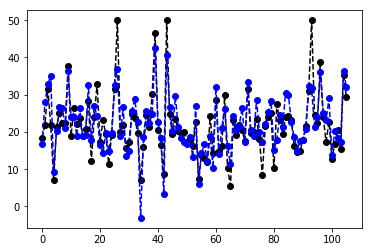

In [51]:
# Plot outputs
plt.plot(y_test, "--o",  color='black')
plt.plot(y_pred, "--o", color='blue')
